## Problem Statement
    
- Provided data set is belong to 1994 Census data. 
- After validating the Data found that the prediction task is to determine whether a person makes over $50K a year or not.

In [2]:
#Importing required Packages
import pandas as pd #Used for input/output & Data exploration
from datetime import datetime #Used for handling date columns 
import missingno #Used for Checking missing values
import matplotlib.pyplot as plt #Used for visulization
import seaborn as sns #Used for Visulization
import math
import numpy as np
import string as str
%matplotlib inline

## Exploratory data analysis 

### Reading data
- Refer the Adult.names file to give the column name as header is missing in adult.data file
- Data files does not have header and having space in value. Hence to handle that used the  header=None, skipinitialspace=True

In [3]:
data=pd.read_csv("adult.data",header=None,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

- Found first record is not as per the required format in validation set as it seems to just a message/comment. Hence skipping the same.

In [5]:
data_val=pd.read_csv("adult.test",header=None,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],skiprows=1,skipinitialspace=True)
data_val.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#Found extra character in validation data target column
data_val['income'].unique()

array(['<=50K.', '>50K.'], dtype=object)

### Null value check

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- No null/nan value found in data set

In [8]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


- No none/nan value found in test data set

### Data Quality check

#### Plotting each feature of Train data

In [9]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


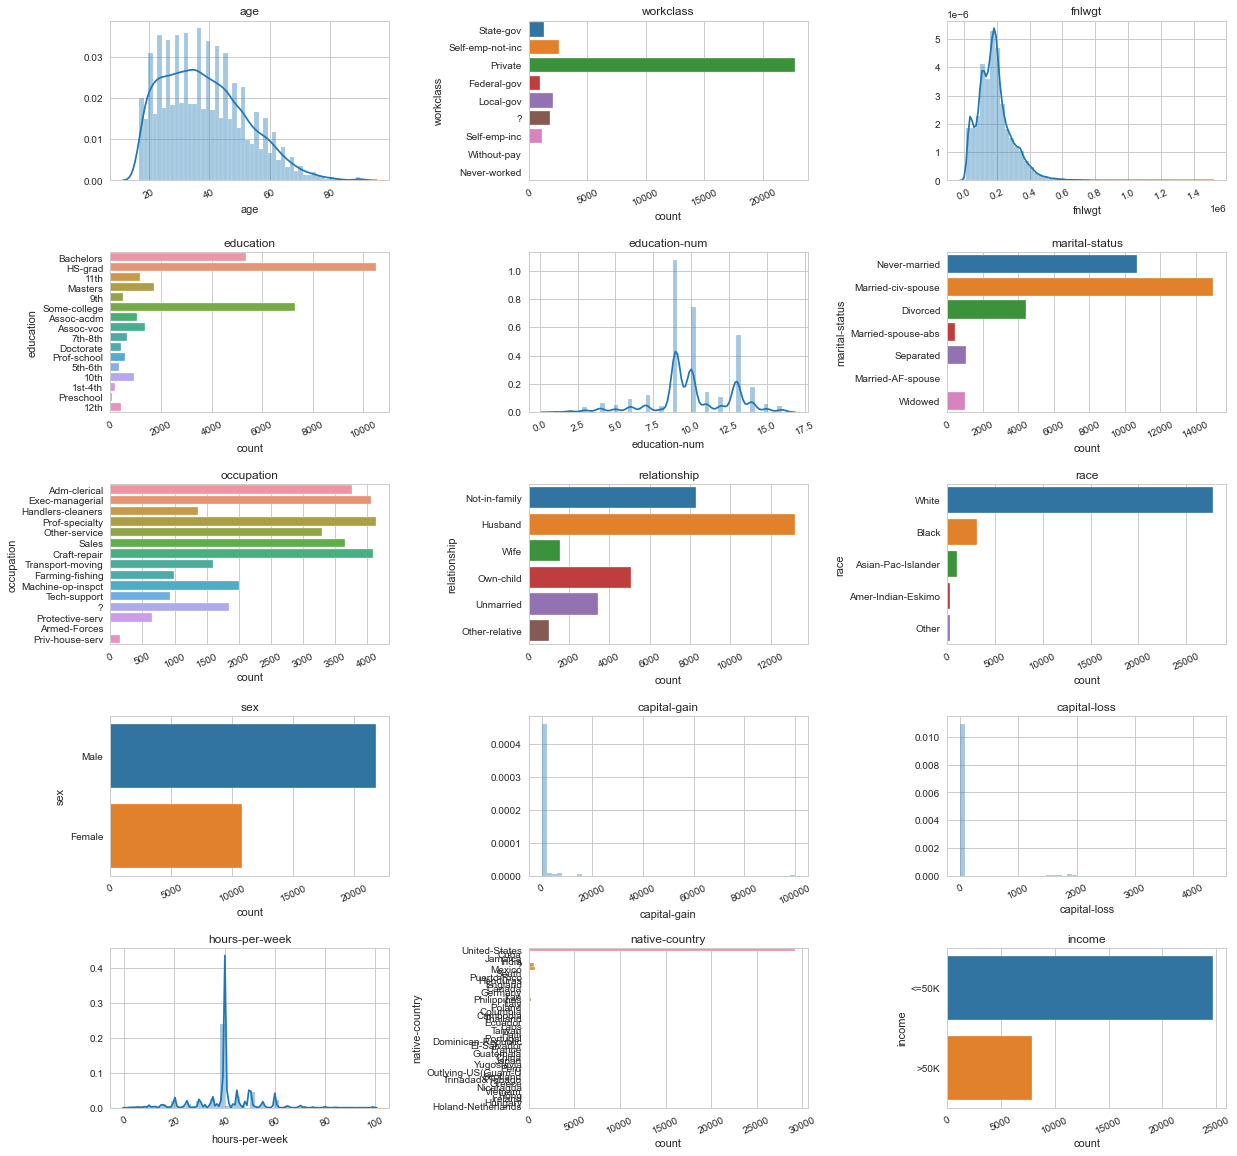

In [10]:
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [11]:
from scipy.stats import skew 
import numpy as np  
import pylab as p 
  
print( '\nChecking Skewness for Column "fnlweight" : ', skew(data['fnlwgt'])) 


Checking Skewness for Column "fnlweight" :  1.446913435142329


##### Obervations
- Found one missing workclass as "?"
- Found one missing Occaupation as "?"
- Found 91.7% Zeros in Capital Gain and 95.3% in Capital loss
- fnlweight is right skewed as Skewness is equated as 1.44 & right tail has more weight shown in above plot
- Native country plot is not clear so need to create large plot for better understanding.

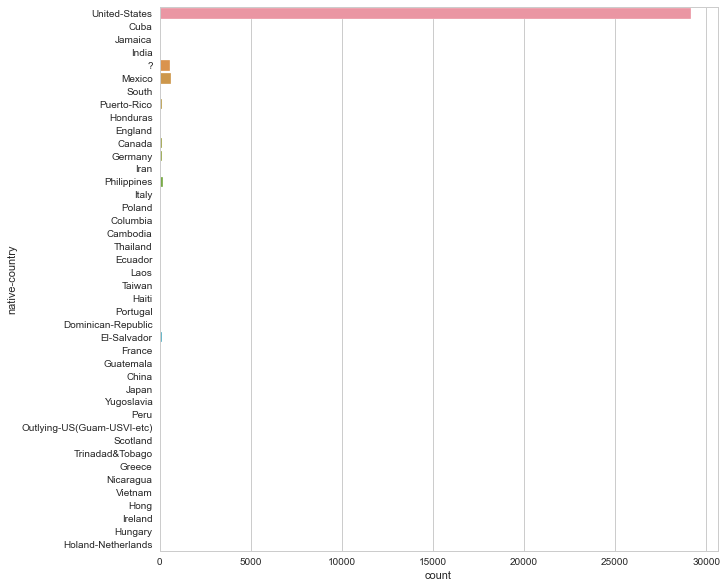

In [12]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y='native-country', data=data)

##### Observations
- Found the missing value as "?" in native-country
- Most of the records are from US

Lets check the distribution

#### Missing value distribution in train data

##### 1. Native Country

In [13]:
(data.groupby(data['native-country'])['income'].count().sort_values(ascending=False)/data.shape[0])*100

native-country
United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                 

###### Observations
- 89.5% records are from United state only 1.7% data is missing

##### 2.  Workclass

In [14]:
(data.groupby(data['workclass'])['income'].count().sort_values(ascending=False)/data.shape[0])*100

workclass
Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: income, dtype: float64

###### Observations

- most of the people are from Private workclass (~70%)
- Missing values are 5.6 %

##### 3. occupation

In [15]:
(data.groupby(data['occupation'])['income'].count().sort_values(ascending=False)/data.shape[0])*10

occupation
Prof-specialty       1.271460
Craft-repair         1.258868
Exec-managerial      1.248733
Adm-clerical         1.157827
Sales                1.120973
Other-service        1.011947
Machine-op-inspct    0.614846
?                    0.566015
Transport-moving     0.490464
Handlers-cleaners    0.420749
Farming-fishing      0.305273
Tech-support         0.285004
Protective-serv      0.199318
Priv-house-serv      0.045760
Armed-Forces         0.002764
Name: income, dtype: float64

###### Observations
- Occupation is correctly distributed
- 0.5 % occupation is missing

##### 4. CapitalGain

In [16]:
print("{} % of Capital Gain is having value as 0".format(round((data[data['capital-gain']==0]['income'].count()/data.shape[0])*100),2))

92.0 % of Capital Gain is having value as 0


##### 5. CapitalLoss

In [17]:
print("{} % of Capital loss is having value as 0".format(round((data[data['capital-loss']==0]['income'].count()/data.shape[0])*100),2))

95.0 % of Capital loss is having value as 0


#### Plotting each feature of Test data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


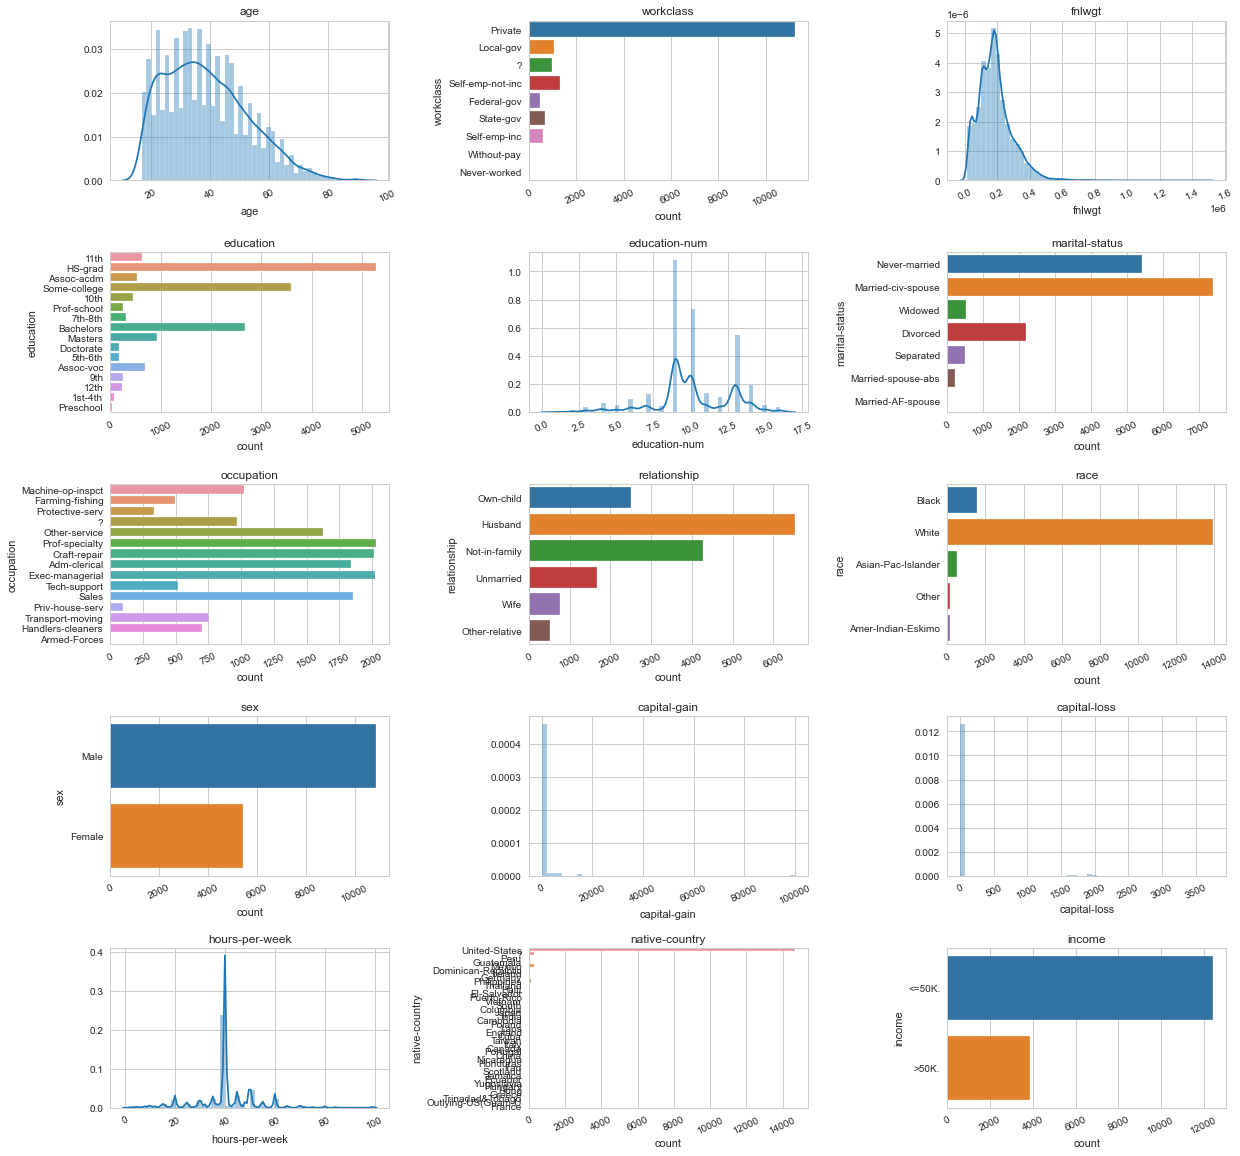

In [18]:
plot_distribution(data_val, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

#### Missing value distribution in test data

In [19]:
(data_val.groupby(data_val['native-country'])['income'].count().sort_values(ascending=False)/data_val.shape[0])*100

native-country
United-States                 90.055893
Mexico                         1.891776
?                              1.682943
Philippines                    0.595786
Puerto-Rico                    0.429949
Germany                        0.423807
Canada                         0.374670
India                          0.313249
El-Salvador                    0.300964
China                          0.288680
Cuba                           0.264112
England                        0.227259
South                          0.214975
Dominican-Republic             0.202690
Italy                          0.196548
Haiti                          0.190406
Portugal                       0.184264
Japan                          0.184264
Poland                         0.165837
Columbia                       0.159695
Jamaica                        0.153553
Guatemala                      0.147411
Greece                         0.122843
Vietnam                        0.116700
Ecuador                  

In [20]:
(data_val.groupby(data_val['workclass'])['income'].count().sort_values(ascending=False)/data_val.shape[0])*100

workclass
Private             68.853265
Self-emp-not-inc     8.113752
Local-gov            6.406240
?                    5.914870
State-gov            4.195074
Self-emp-inc         3.556293
Federal-gov          2.899085
Without-pay          0.042995
Never-worked         0.018426
Name: income, dtype: float64

In [21]:
(data_val.groupby(data_val['occupation'])['income'].count().sort_values(ascending=False)/data_val.shape[0])*10

occupation
Prof-specialty       1.248081
Exec-managerial      1.240710
Craft-repair         1.236411
Sales                1.138751
Adm-clerical         1.130766
Other-service        0.999939
Machine-op-inspct    0.626497
?                    0.593330
Transport-moving     0.465573
Handlers-cleaners    0.431177
Tech-support         0.318162
Farming-fishing      0.304650
Protective-serv      0.205147
Priv-house-serv      0.057122
Armed-Forces         0.003685
Name: income, dtype: float64

In [22]:
print("{} % of Capital Gain is having value as 0".format(round((data_val[data_val['capital-gain']==0]['income'].count()/data_val.shape[0])*100),2))

92.0 % of Capital Gain is having value as 0


In [23]:
print("{} % of Capital loss is having value as 0".format(round((data_val[data_val['capital-loss']==0]['income'].count()/data_val.shape[0])*100),2))

95.0 % of Capital loss is having value as 0


##### Observations
- As per the missing value distribution in data and validation set data, we have found similar distribution for "?". 
- Hence We will converting "?" to "Unknown" Category rather removing the records.
- Capital Loss and Capital Gain both are having same pattern in Data and validation data set. Hence at this point of time we are not sure about keeping it or removing it 

### Handling Missing Values

##### For Given Data

In [24]:
data.loc[(data['native-country']=='?'),'native-country']="Unknown"

In [25]:
data.loc[(data['workclass']=='?'),'workclass']="Unknown"

In [26]:
data.loc[(data['occupation']=='?'),'occupation']="Unknown"

##### For validation Data

In [27]:
data_val.loc[(data_val['native-country']=='?'),'native-country']="Unknown"
data_val.loc[(data_val['workclass']=='?'),'workclass']="Unknown"
data_val.loc[(data_val['occupation']=='?'),'occupation']="Unknown"

### Validating the independent features importance on target

#### income vs Race

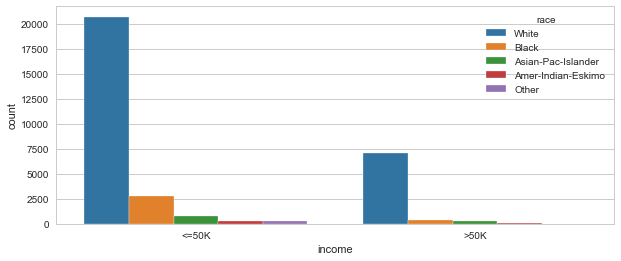

In [28]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='income', hue='race', data =data)

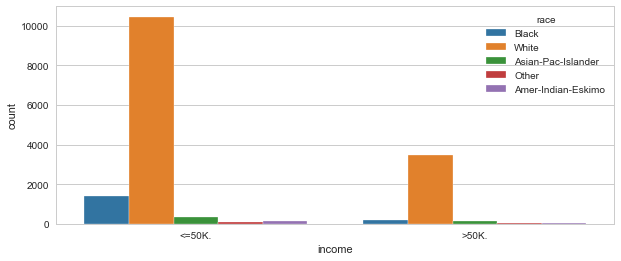

In [29]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='income', hue='race', data =data_val)

##### Observations
- If Race='white' then we have high probability to have salary>50K
- If Race is in Amer-Indian-Eskimo or other then we can not have Salary>50K

#### income vs Relationship

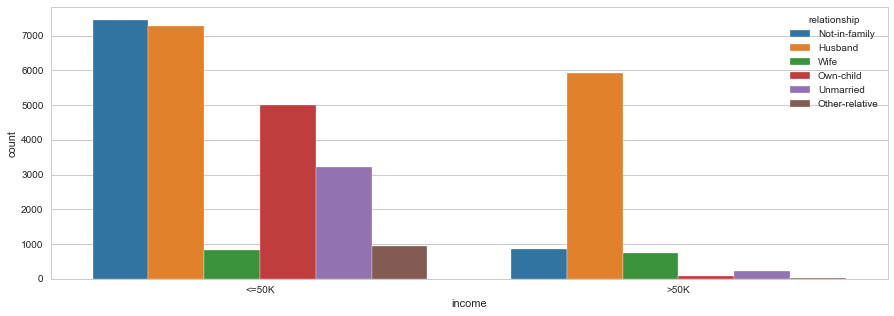

In [30]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='income', hue='relationship', data =data)

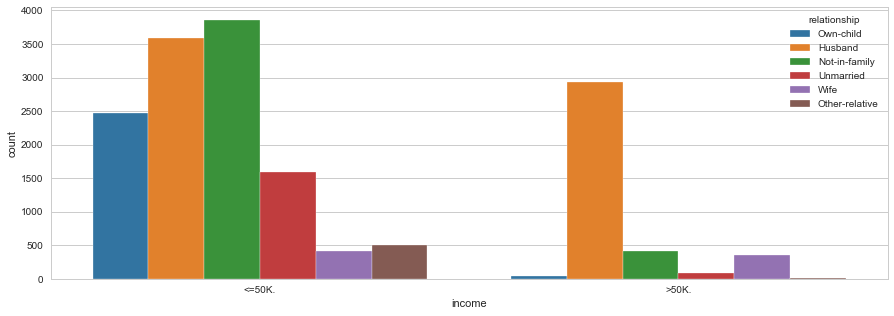

In [31]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='income', hue='relationship', data =data_val)

##### Observations
- if Relationship=Husband then we have high chance to have Salary>50K

#### Salary vs marital-status

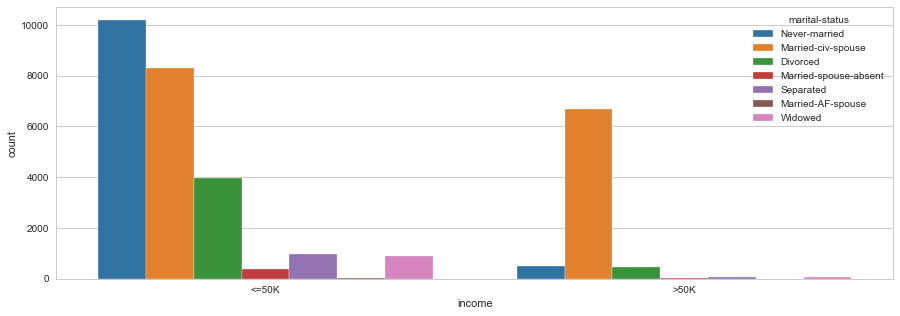

In [32]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='income', hue='marital-status', data =data)

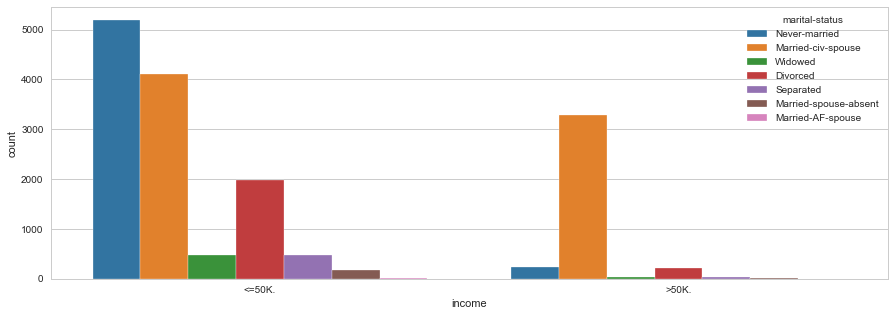

In [33]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='income', hue='marital-status', data =data_val)

#### income vs Age

Min 
 income
<=50K    17
>50K     19
Name: age, dtype: int64


income
<=50K    34
>50K     44
Name: age, dtype: int64

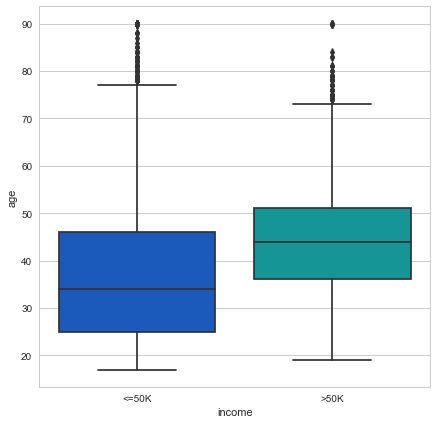

In [34]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='income',y='age', data=data, palette='winter')
sns.set_style('whitegrid')
print("Min \n", data.groupby('income')['age'].min())
data.groupby('income')['age'].median()


Min 
 income
<=50K.    17
>50K.     19
Name: age, dtype: int64


income
<=50K.    34
>50K.     43
Name: age, dtype: int64

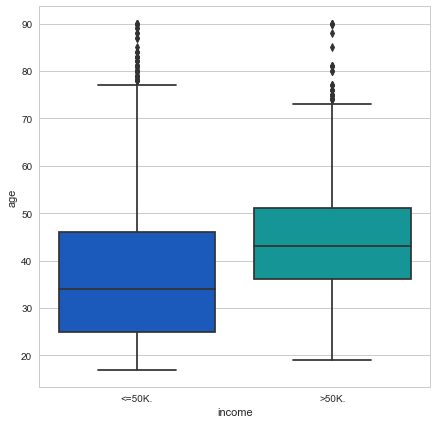

In [35]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='income',y='age', data=data_val, palette='winter')
sns.set_style('whitegrid')
print("Min \n", data_val.groupby('income')['age'].min())
data_val.groupby('income')['age'].median()

##### Observation
- Median Age to have Salary>50K is ~44 where as <50k is ~34. 
- Min age to have Salary>50k is 19 where as <50K is 17.

## Data Preprocessing

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [37]:
data_val.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Encoding for Target Variable

In [38]:
#Encoding the target varibale
data['income']=data['income'].map({'<=50K':0,'>50K':1})
data_val['income']=data_val['income'].map({'<=50K.':0,'>50K.':1})

In [39]:
(data['income'].value_counts()/data.shape[0])*100

0    75.919044
1    24.080956
Name: income, dtype: float64

In [40]:
(data_val['income'].value_counts()/data_val.shape[0])*100

0    76.377372
1    23.622628
Name: income, dtype: float64

Removiing Imabalance from Income Column

In [41]:
#Count for each label in Income column
income_0, income_1 = data.income.value_counts()
print('Count of "O" in Column Income: ', income_0)
print('Count of "1" in Column Income: ', income_1)

# Divide by class
data_0 = data[data['income'] == 0]
data_1 = data[data['income'] == 1]

Count of "O" in Column Income:  24720
Count of "1" in Column Income:  7841


Randomly under-sampling:
1    7841
0    7841
Name: income, dtype: int64


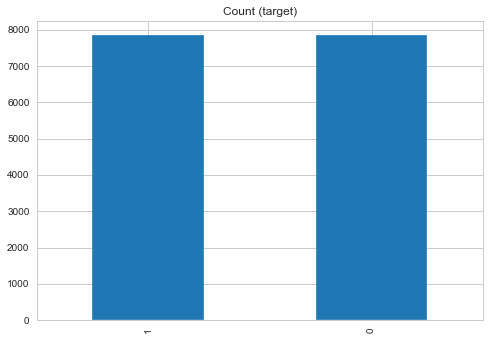

In [42]:
#randomly under-sampling majority class in Income column

data_class_0_under_samp = data_0.sample(income_1)
data_conc_under_samp = pd.concat([data_class_0_under_samp, data_1], axis=0)

print('Randomly under-sampling:')
print(data_conc_under_samp.income.value_counts())

data_conc_under_samp.income.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
1    24720
0    24720
Name: income, dtype: int64


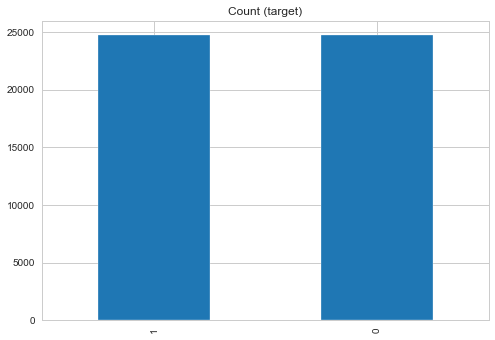

In [43]:
#randomly over-sampling minority class in Income column

data_class_1_over_samp = data_1.sample(income_0, replace=True)
data_conc_over_samp = pd.concat([data_0, data_class_1_over_samp], axis=0)

print('Random over-sampling:')
print(data_conc_over_samp.income.value_counts())

data_conc_over_samp.income.value_counts().plot(kind='bar', title='Count (target)');

#### Removing duplicate column

In [44]:
# Let's drop "education.num" feature. We will use one-hot encoding instead.
data.drop("education-num",axis=1,inplace=True)
data_val.drop("education-num",axis=1,inplace=True)

#### Validating the distinct value before applying one-hot encoding

In [45]:
frequency={}
for i in ['workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country']:
    frequency[i]=data[i].nunique()
    
freqdf=pd.DataFrame.from_dict(frequency,orient='index').reset_index()
freqdf.columns=["Field","Distinct_value"]
freqdf.sort_values(by="Distinct_value",ascending=False)

,Field,Distinct_value
7,native-country,42
1,education,16
3,occupation,15
0,workclass,9
2,marital-status,7
4,relationship,6
5,race,5
6,sex,2


- As per above analysis, we have observed that Native-Country has huge Distinct_value. 
- Hence we can not apply the one-hot encoding. 
- Based on the past experience, we haver choose to apply Weight evidence encoding. 

#### Weight Of Evidence Encoding for Native-country

In [46]:
prob_df = data.groupby(['native-country'])['income'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df.sort_values(by='income',ascending=False).iloc[:10]

,income
native-country,
Iran,0.418605
France,0.413793
India,0.400000
Taiwan,0.392157
Japan,0.387097
Yugoslavia,0.375000
Cambodia,0.368421
Italy,0.342466
England,0.333333


Observation:-
- Although 89.5% records are from United state but it is not part of country which help to idetify the >50K income.

In [47]:
#Weight of Evidence encoding function

def WOE(df,column,targetcolumn,train_data,woe_lables={}):
    if train_data==1:
        prob_df=df.groupby([column])[targetcolumn].mean()
        prob_df=pd.DataFrame(prob_df)
        prob_df['Not_'+targetcolumn]=1-prob_df[targetcolumn]
        # since the log of zero is not defined
        prob_df.loc[prob_df[targetcolumn] == 0, targetcolumn] = 0.00001
        prob_df.loc[prob_df['Not_'+targetcolumn] == 0, 'Not_'+targetcolumn] = 0.00001
        prob_df['WOE']=np.log(prob_df[targetcolumn]/prob_df['Not_'+targetcolumn])
        woe_lables=prob_df['WOE'].to_dict()
        df['WOE_'+column]=df[column].map(woe_lables)
    else:
        df['WOE_'+column]=df[column].map(woe_lables)
    return woe_lables

In [48]:
woe_lables=WOE(data,'native-country','income',1)
print(woe_lables)

{'Cambodia': -0.5389965007326869, 'Canada': -0.7431576011346067, 'China': -1.01160091167848, 'Columbia': -3.349904087274605, 'Cuba': -1.0296194171811583, 'Dominican-Republic': -3.5263605246161616, 'Ecuador': -1.791759469228055, 'El-Salvador': -2.3774864011671637, 'England': -0.6931471805599454, 'France': -0.34830669426821587, 'Germany': -0.7484098592349947, 'Greece': -0.9650808960435872, 'Guatemala': -3.012261575505202, 'Haiti': -2.3025850929940455, 'Holand-Netherlands': -11.512925464970229, 'Honduras': -2.4849066497880004, 'Hong': -0.8472978603872036, 'Hungary': -1.203972804325936, 'India': -0.4054651081081643, 'Iran': -0.32850406697203594, 'Ireland': -1.33500106673234, 'Italy': -0.6523251860396901, 'Jamaica': -1.9600947840472698, 'Japan': -0.4595323293784402, 'Laos': -2.0794415416798357, 'Mexico': -2.9169513957008766, 'Nicaragua': -2.772588722239781, 'Outlying-US(Guam-USVI-etc)': -11.512925464970229, 'Peru': -2.6741486494265287, 'Philippines': -0.8091070616548137, 'Poland': -1.386294

In [49]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,WOE_native-country
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,-1.120952
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,-1.120952
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,-1.120952
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,-1.120952
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,-1.029619


In [50]:
woe_lables=WOE(data_val,'native-country','income',0,woe_lables)
print(woe_lables)

{'Cambodia': -0.5389965007326869, 'Canada': -0.7431576011346067, 'China': -1.01160091167848, 'Columbia': -3.349904087274605, 'Cuba': -1.0296194171811583, 'Dominican-Republic': -3.5263605246161616, 'Ecuador': -1.791759469228055, 'El-Salvador': -2.3774864011671637, 'England': -0.6931471805599454, 'France': -0.34830669426821587, 'Germany': -0.7484098592349947, 'Greece': -0.9650808960435872, 'Guatemala': -3.012261575505202, 'Haiti': -2.3025850929940455, 'Holand-Netherlands': -11.512925464970229, 'Honduras': -2.4849066497880004, 'Hong': -0.8472978603872036, 'Hungary': -1.203972804325936, 'India': -0.4054651081081643, 'Iran': -0.32850406697203594, 'Ireland': -1.33500106673234, 'Italy': -0.6523251860396901, 'Jamaica': -1.9600947840472698, 'Japan': -0.4595323293784402, 'Laos': -2.0794415416798357, 'Mexico': -2.9169513957008766, 'Nicaragua': -2.772588722239781, 'Outlying-US(Guam-USVI-etc)': -11.512925464970229, 'Peru': -2.6741486494265287, 'Philippines': -0.8091070616548137, 'Poland': -1.386294

In [51]:
data.drop("native-country",axis=1,inplace=True)
data_val.drop("native-country",axis=1,inplace=True)

#### Encoding rest of Categorical columns

In [52]:
# Now we will encode categorical features using one-hot encoding, i.e. each category will now be represented by a separate column
# containing only 0 and 1, depending on whether this category is relevant in a sample (row in our data) 
data=pd.get_dummies(data, drop_first = True)

In [53]:
# containing only 0 and 1, depending on whether this category is relevant in a sample (row in our data) 
data_val=pd.get_dummies(data_val, drop_first = True)

In [54]:
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,WOE_native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,2174,0,40,0,-1.120952,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,0,0,13,0,-1.120952,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,0,0,40,0,-1.120952,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,0,0,40,0,-1.120952,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,0,0,40,0,-1.029619,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [55]:
data_val.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,WOE_native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,0,0,40,0,-1.120952,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,0,0,50,0,-1.120952,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,0,0,40,1,-1.120952,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,7688,0,40,1,-1.120952,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,0,0,30,0,-1.120952,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Splitting the Data

In [72]:
X=data.drop('income',axis=1).values
print(X)

[[3.90000e+01 7.75160e+04 2.17400e+03 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [5.00000e+01 8.33110e+04 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [3.80000e+01 2.15646e+05 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 ...
 [5.80000e+01 1.51910e+05 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [2.20000e+01 2.01490e+05 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [5.20000e+01 2.87927e+05 1.50240e+04 ... 0.00000e+00 1.00000e+00
  0.00000e+00]]


In [ ]:
Y=data['income'].values
Y

In [75]:
#test data split & standardization

y_val = data_val['income'].values

In [76]:
X_val = data_val.drop('income',axis=1).values

In [58]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [60]:
print("Train:",X_train.shape,"Test:=",y_train.shape)

Train: (24420, 59) Test:= (24420,)


In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_sc=sc.fit_transform(X)
X_test_sc = sc.fit_transform(X_val)

Convolutional Neural Network

In [74]:
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,WOE_native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,2174,0,40,0,-1.120952,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,0,0,13,0,-1.120952,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,0,0,40,0,-1.120952,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,0,0,40,0,-1.120952,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,0,0,40,0,-1.029619,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [79]:
# define the keras model
classifier = Sequential()
classifier.add(Dense(12, input_dim=59, activation='relu'))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
# compile the keras model
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
classifier.fit(X_sc, Y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = classifier.evaluate(X_test_sc, y_val)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
32561/32561 [==============================] - 3s 84us/step - loss: 0.3526 - accuracy: 0.8341
Epoch 2/150
32561/32561 [==============================] - 3s 82us/step - loss: 0.3172 - accuracy: 0.8530
Epoch 3/150
32561/32561 [==============================] - 3s 83us/step - loss: 0.3105 - accuracy: 0.8554
Epoch 4/150
32561/32561 [==============================] - 3s 84us/step - loss: 0.3083 - accuracy: 0.8553
Epoch 5/150
32561/32561 [==============================] - 3s 87us/step - loss: 0.3060 - accuracy: 0.8583
Epoch 6/150
32561/32561 [==============================] - 3s 84us/step - loss: 0.3042 - accuracy: 0.8590
Epoch 7/150
32561/32561 [==============================] - 3s 84us/step - loss: 0.3037 - accuracy: 0.8577
Epoch 8/150
32561/32561 [==============================] - 3s 87us/step - loss: 0.3025 - accuracy: 0.8601
Epoch 9/150
32561/32561 [==============================] - 3s 81us/step - loss: 0.3018 - accuracy: 0.8598
Epoch 10/150
32561/32561 [====================

Hyperparameter tuning using grid-search algorithm for finding best suited paramters

Drop-out & weight constraint

In [62]:
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
    model = Sequential()
    model.add(Dense(12, input_dim=59, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
np.random.seed(seed)

In [63]:
# model creation
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)

In [64]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

Best: 0.852416 using {'dropout_rate': 0.0, 'weight_constraint': 4}
0.850246 (0.003061) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.850041 (0.001622) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.850737 (0.003021) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.852416 (0.002379) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.851188 (0.002762) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.851433 (0.002738) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.851228 (0.003280) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.851761 (0.002180) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.851802 (0.002518) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.852170 (0.002862) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.849140 (0.001394) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.851802 (0.002540) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.851720 (0.002960) with: {'dropout_rate': 0.2, 'weight_constraint': 

Batch size & epochs

In [90]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.760074 using {'batch_size': 10, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 10, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 10, 'epochs': 50}
0.760074 (0.003738) with: {'batch_size': 10, 'epochs': 100}
0.760074 (0.003738) with: {'batch_size': 20, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 20, 'epochs': 50}
0.760074 (0.003738) with: {'batch_size': 20, 'epochs': 100}
0.760074 (0.003738) with: {'batch_size': 40, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 40, 'epochs': 50}
0.760074 (0.003738) with: {'batch_size': 40, 'epochs': 100}
0.760074 (0.003738) with: {'batch_size': 60, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 60, 'epochs': 50}
0.760074 (0.003738) with: {'batch_size': 60, 'epochs': 100}
0.760074 (0.003738) with: {'batch_size': 80, 'epochs': 10}
0.760074 (0.003738) with: {'batch_size': 80, 'epochs': 50}
0.760074 (0.003738) with: {'batch_size': 80, 'epochs': 100}
0.760074 (0.003738) with: {'batch_size': 100, 'epochs': 

Optimization algorithm

In [103]:
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=59, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827431 using {'optimizer': 'Adamax'}
0.759375 (0.003072) with: {'optimizer': 'SGD'}
0.796351 (0.006762) with: {'optimizer': 'RMSprop'}
0.803416 (0.043897) with: {'optimizer': 'Adagrad'}
0.752189 (0.059860) with: {'optimizer': 'Adadelta'}
0.795798 (0.023760) with: {'optimizer': 'Adam'}
0.827431 (0.003947) with: {'optimizer': 'Adamax'}
0.760787 (0.004200) with: {'optimizer': 'Nadam'}


Learning rate & momentum

In [104]:
from keras.optimizers import SGD
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=59, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854586 using {'learn_rate': 0.001, 'momentum': 0.6}
0.853931 (0.002867) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.853972 (0.003939) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.853849 (0.003697) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.854586 (0.004063) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.852375 (0.004238) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.853276 (0.004577) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.852293 (0.005589) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.851433 (0.002802) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.851433 (0.002788) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.852048 (0.002711) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.850860 (0.002930) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.852948 (0.001567) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.851147 (0.002288) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.850696 (0.000452) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.846929 (0.004173) with: {'learn_rate':

Weight Initialization

In [105]:
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=59, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852252 using {'init_mode': 'normal'}
0.849877 (0.004604) with: {'init_mode': 'uniform'}
0.852048 (0.001896) with: {'init_mode': 'lecun_uniform'}
0.852252 (0.001899) with: {'init_mode': 'normal'}
0.760074 (0.003738) with: {'init_mode': 'zero'}
0.850328 (0.003613) with: {'init_mode': 'glorot_normal'}
0.849631 (0.003973) with: {'init_mode': 'glorot_uniform'}
0.849877 (0.002407) with: {'init_mode': 'he_normal'}
0.851761 (0.004869) with: {'init_mode': 'he_uniform'}


Activation Function

In [106]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=59, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852703 using {'activation': 'hard_sigmoid'}
0.852580 (0.001350) with: {'activation': 'softmax'}
0.852252 (0.004148) with: {'activation': 'softplus'}
0.848935 (0.002731) with: {'activation': 'softsign'}
0.850614 (0.002048) with: {'activation': 'relu'}
0.850205 (0.003849) with: {'activation': 'tanh'}
0.851392 (0.003697) with: {'activation': 'sigmoid'}
0.852703 (0.001357) with: {'activation': 'hard_sigmoid'}
0.851679 (0.003053) with: {'activation': 'linear'}


Number of neuron in hidden layer

In [107]:
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=59, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851597 using {'neurons': 10}
0.848485 (0.001127) with: {'neurons': 1}
0.850573 (0.002724) with: {'neurons': 5}
0.851597 (0.002902) with: {'neurons': 10}
0.851229 (0.001657) with: {'neurons': 15}
0.850369 (0.000531) with: {'neurons': 20}
0.850655 (0.002731) with: {'neurons': 25}
0.851392 (0.002901) with: {'neurons': 30}


Using best parameters & creating new model

In [80]:
from keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(10, input_dim=59, kernel_initializer='normal', activation='hard_sigmoid', kernel_constraint=maxnorm(4)))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
optimizer = SGD(lr=0.001, momentum=0.6)
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

seed = 7
np.random.seed(seed)

In [83]:
# fit the keras model on the dataset
model.fit(X_sc, Y, epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_sc, y_val)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
32561/32561 [==============================] - 3s 78us/step - loss: 0.3109 - accuracy: 0.8552
Epoch 2/100
32561/32561 [==============================] - 3s 78us/step - loss: 0.3108 - accuracy: 0.8551
Epoch 3/100
32561/32561 [==============================] - 2s 76us/step - loss: 0.3107 - accuracy: 0.8549
Epoch 4/100
32561/32561 [==============================] - 2s 73us/step - loss: 0.3107 - accuracy: 0.8552
Epoch 5/100
32561/32561 [==============================] - 2s 73us/step - loss: 0.3106 - accuracy: 0.8551
Epoch 6/100
32561/32561 [==============================] - 3s 77us/step - loss: 0.3106 - accuracy: 0.8556
Epoch 7/100
32561/32561 [==============================] - 3s 77us/step - loss: 0.3105 - accuracy: 0.8556
Epoch 8/100
32561/32561 [==============================] - 3s 78us/step - loss: 0.3105 - accuracy: 0.8552
Epoch 9/100
32561/32561 [==============================] - 3s 80us/step - loss: 0.3104 - accuracy: 0.8550
Epoch 10/100
32561/32561 [====================